#### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from collections import Counter

import math
import random

import requests, io

#### Importing the Data

In [4]:
response = requests.get('https://antrikshassignment.s3.amazonaws.com/Questions.csv')
file_object = io.StringIO(response.content.decode('latin-1'))
dfQ = pd.read_csv(file_object)

In [ ]:
response = requests.get('https://antrikshassignment.s3.amazonaws.com/Answers.csv')
file_object = io.StringIO(response.content.decode('latin-1'))
dfA = pd.read_csv(file_object)

In [ ]:
response = requests.get('https://antrikshassignment.s3.amazonaws.com/Tags.csv')
file_object = io.StringIO(response.content.decode('latin-1'))
dfT = pd.read_csv(file_object)

In [ ]:
response = requests.get('https://antrikshassignment.s3.amazonaws.com/Users.csv')
file_object = io.StringIO(response.content.decode('latin-1'))
dfU = pd.read_csv(file_object)

#### Data Cleaning for Questions file

In [0]:
dfQ.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [0]:
# Delete irrelevent columns from Question file
dfQ.drop(["Body"] , axis= 1, inplace= True)
dfQ.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...


#### Data Cleaning for Answers file

In [0]:
dfA.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [0]:
# Delete irrelevent columns from Answer file.
dfA.drop(["Body"] , axis= 1, inplace= True)
dfA.head()

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01T14:45:37Z,90,13
1,124,26.0,2008-08-01T16:09:47Z,80,12
2,199,50.0,2008-08-01T19:36:46Z,180,1
3,269,91.0,2008-08-01T23:49:57Z,260,4
4,307,49.0,2008-08-02T01:49:46Z,260,28


#### Merging ParentId in dfA to Id in dfQ

In [0]:
dfQA = pd.merge(dfQ, dfA, how='right', left_on='Id', right_on= 'ParentId')
dfQA.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26.0,2008-08-01T16:09:47Z,80,12
1,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109.0,2008-08-13T16:09:09Z,80,6
2,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174.0,2010-09-22T15:37:30Z,80,1
3,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61.0,2008-08-01T14:45:37Z,90,13
4,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709.0,2008-10-14T18:41:45Z,90,2


In [0]:
# Let's see what we can make out from the datatypes
# Printing the Data types of Question-Answers file.
dfQA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 11 columns):
Id_x              int64
OwnerUserId_x     float64
CreationDate_x    object
ClosedDate        object
Score_x           int64
Title             object
Id_y              int64
OwnerUserId_y     float64
CreationDate_y    object
ParentId          int64
Score_y           int64
dtypes: float64(2), int64(5), object(4)
memory usage: 184.4+ MB


In [0]:
dfQA = dfQA.dropna(subset = ['OwnerUserId_x', 'OwnerUserId_y'])

# Id_x, OwnerUserId_x, Id_y, OwnerUserId_y, ParentId need to be set to string since they are nominal categorical datatypes
dfQA[['Id_x', 'OwnerUserId_x', 'OwnerUserId_y', 'ParentId', 'Id_y']] = dfQA[['Id_x', 'OwnerUserId_x', 'OwnerUserId_y', 'ParentId', 'Id_y']].astype('int64').astype(str)

dfQA.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01T16:09:47Z,80,12
1,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13T16:09:09Z,80,6
2,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22T15:37:30Z,80,1
3,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61,2008-08-01T14:45:37Z,90,13
4,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709,2008-10-14T18:41:45Z,90,2


#### Data Cleaning for Tags file

In [0]:
dfT.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [0]:
# Print the Data types ofTag file
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
Id     int64
Tag    object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [0]:
# Making sure all the datypes in dfT are in string format
dfT['Id'] = dfT.round(0).astype(str)
dfT['Tag'] = dfT['Tag'].astype(str)

dfT_tags_grouped = dfT.groupby(['Id'])['Tag'].apply(','.join).reset_index() # Grouping all the tags together

#### Merging the dfQA (Questions and Answers file) into dfT (tag file)

In [0]:
dfQAT = pd.merge(dfQA, dfT_tags_grouped, how='inner', left_on='Id_x', right_on= 'Id')

#### Data Cleaning for Users file

In [0]:
dfU.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [0]:
# Converting required datatypes into proper format
dfU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
Unnamed: 0          int64
id                  int64
display_name        object
creation_date       object
last_access_date    object
reputation          int64
up_votes            int64
down_votes          int64
views               int64
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


In [0]:
dfU = dfU.drop(columns = ['Unnamed: 0', 'display_name', 'creation_date','last_access_date'])
dfU['id'] = dfU['id'].astype(str)
dfU = dfU.drop_duplicates()
dfU.head()

,id,reputation,up_votes,down_votes,views
0,26,11820,565,67,3547
27,1109,116072,457,136,6905
85,364174,325,25,1,60
87,61,22779,1321,219,1731
97,20709,978,73,2,96


#### Merging the dfQAT (Questions, Answers, Tag file) into dfU (Users file)

In [0]:
dfQATU = pd.merge(dfQAT, dfU, how='left', left_on='OwnerUserId_y', right_on= 'id')

# Let's begin the analysis!!!

#### Which all Questions had the highest scores

In [0]:
top_Questions =list(zip(dfQ["Id"], dfQ["Score"], dfQ["Title"]))
top_Questions.sort(key=lambda x: x[1],reverse=True)
for id,s,t in top_Questions[:5]:
    print("Question id:",id)
    print("Score :",s)
    print("Question Title\t:",t,'\n')

# Since there is no need of the 'Title' column, we might as well drop it
dfQ.drop(["Title"] , axis= 1, inplace= True)

Question id: 348170
Score : 5190
Question Title	: How to undo 'git add' before commit? 

Question id: 40480
Score : 3613
Question Title	: Is Java "pass-by-reference" or "pass-by-value"? 

Question id: 406230
Score : 2537
Question Title	: Regular expression to match line that doesn't contain a word? 

Question id: 520650
Score : 2399
Question Title	: Make an existing Git branch track a remote branch? 

Question id: 2669690
Score : 2363
Question Title	: Why does Google prepend while(1); to their JSON responses? 



In [0]:
inp0 = dfQATU
inp0.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Id,Tag,id,reputation,up_votes,down_votes,views
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01T16:09:47Z,80,12,80,"flex,actionscript-3,air",26,11820.0,565.0,67.0,3547.0
1,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13T16:09:09Z,80,6,80,"flex,actionscript-3,air",1109,116072.0,457.0,136.0,6905.0
2,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22T15:37:30Z,80,1,80,"flex,actionscript-3,air",364174,325.0,25.0,1.0,60.0
3,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61,2008-08-01T14:45:37Z,90,13,90,"svn,tortoisesvn,branch,branching-and-merging",61,22779.0,1321.0,219.0,1731.0
4,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709,2008-10-14T18:41:45Z,90,2,90,"svn,tortoisesvn,branch,branching-and-merging",20709,978.0,73.0,2.0,96.0


#### Which tag has the average maximum and minimum time to get the answer?

In [0]:
# Extract the Creation date from CreationDate_x column.
inp0['CreationDate_x']= inp0['CreationDate_x'].apply(lambda x: x.split("T")[0])

# Extract the Creation date from CreationDate_y column.
inp0['CreationDate_y']= inp0['CreationDate_y'].apply(lambda x: x.split("T")[0])

# Convert the Creation date column into date type.
inp0['CreationDate_x'] = pd.to_datetime(inp0['CreationDate_x'])
inp0['CreationDate_y'] = pd.to_datetime(inp0['CreationDate_y'])

In [0]:
# Calculating the time difference between creation date of question and creation date of answer.
# Followed by convertion into integer type

inp0['time_diff_x'] = inp0['CreationDate_y'] - inp0['CreationDate_x']
inp0["time_diff_x"]= inp0["time_diff_x"].astype(str) 
inp0['time_diff_x']= inp0['time_diff_x'].apply(lambda x: x.split(" ")[0])
inp0["time_diff_x"]= inp0["time_diff_x"].astype(int)
inp0.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Id,Tag,id,reputation,up_votes,down_votes,views,time_diff_x
0,80,26,2008-08-01,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01,80,12,80,"flex,actionscript-3,air",26,11820.0,565.0,67.0,3547.0,0
1,80,26,2008-08-01,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13,80,6,80,"flex,actionscript-3,air",1109,116072.0,457.0,136.0,6905.0,12
2,80,26,2008-08-01,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22,80,1,80,"flex,actionscript-3,air",364174,325.0,25.0,1.0,60.0,782
3,90,58,2008-08-01,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61,2008-08-01,90,13,90,"svn,tortoisesvn,branch,branching-and-merging",61,22779.0,1321.0,219.0,1731.0,0
4,90,58,2008-08-01,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709,2008-10-14,90,2,90,"svn,tortoisesvn,branch,branching-and-merging",20709,978.0,73.0,2.0,96.0,74


In [0]:
# To avoid any repition of tags, let us consider the minimum time required to answer any particular answer
inp1 = inp0.loc[inp0.groupby("Id_x")["time_diff_x"].idxmin()]

In [0]:
tag_time = inp1[['Tag', 'time_diff_x']].drop_duplicates().reset_index(drop=True)
tag_time.head()

,Tag,time_diff_x
0,"jquery,google-apps-script",1
1,"ios,uikit,interface-builder",0
2,r,0
3,"c++,arrays,deque",0
4,"python,input,validation",0


In [0]:
tagTime = {}
tag_time = tag_time.dropna().reset_index()

for i in tqdm_notebook(range(len(tag_time['Tag']))):
    for tag in tag_time['Tag'][i].split(','):
        try:
            tagTime[tag].append(tag_time['time_diff_x'][i])
        except Exception:
            tagTime[tag] = [tag_time['time_diff_x'][i]]

In [0]:
tagTimeAvg = {}
for key in list(tagTime.keys()):
    tagTimeAvg[key] = np.average(tagTime[key])

#### What would be the expected time for your question to be answered given the tag is 'excel'

In [0]:
print('My question is expected to be answered within ', tagTimeAvg['excel'], ' days')

My question is expected to be answered within  19.903372835004557  days


In [0]:
tagTimeAvg = pd.DataFrame([list(tagTimeAvg.keys()), list(tagTimeAvg.values())])

tagTimeAvg = tagTimeAvg.transpose()
tagTimeAvg.columns = ['Tag', 'time_diff_x']
tagTimeAvg = tagTimeAvg.sort_values('time_diff_x')

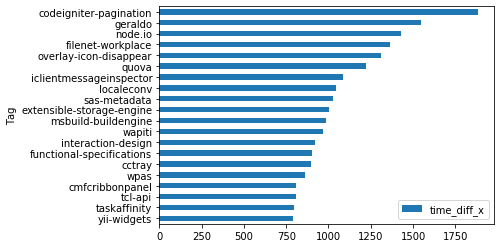

In [0]:
# Top 20 tags with highest average time to answer

highest_tag_time= tagTimeAvg.tail(20)
highest_tag_time.plot.barh(x='Tag', y='time_diff_x', rot=0)

#### Corresponding expected answer time for data science tags

In [0]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []

for tag in data_science:
    index = list(tagTimeAvg['Tag']).index(tag)
    x.append(tag)
    y.append(list(tagTimeAvg['time_diff_x'])[index])
    
print(x)
print(y)

['python', 'r', 'matlab', 'sas', 'excel', 'sql']
[15.619264209907485, 16.54947492974412, 13.526236881559221, 9.231023102310232, 19.903372835004557, 8.330789825970548]


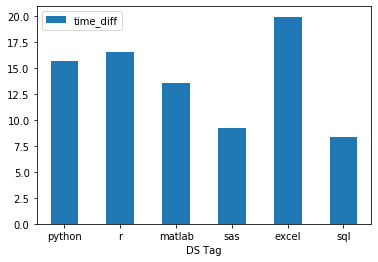

In [0]:
DS_time_diff_df = pd.DataFrame(list(zip(x, y)), columns =['DS Tag', 'time_diff'])
DS_time_diff_df.plot.bar(x='DS Tag', y='time_diff', rot=0)

In [0]:
DS_time_diff_df

,DS Tag,time_diff
0,python,15.619264
1,r,16.549475
2,matlab,13.526237
3,sas,9.231023
4,excel,19.903373
5,sql,8.330790


#### Should you have more tags for a question to be anwered quickly?

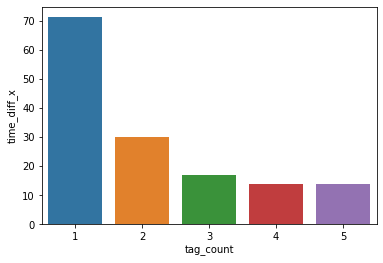

In [0]:
tag_time['tag_count'] = [len(tags.split(',')) for tags in tag_time['Tag']]

tag_time_grouped = tag_time.groupby('tag_count').mean()
tag_time_grouped.reset_index(inplace=True)
sns.barplot(x='tag_count', y='time_diff_x', data = tag_time_grouped)

#### What are the most popular tags?

In [0]:
tags = list(inp1['Tag'].unique())
all_tags = list(dfT['Tag'].unique())
print('Number of tags are ', len(all_tags))

Number of tags are  37035


In [0]:
count_tags = Counter(list(dfT['Tag'])) # Using dfT (Tags Dataframe) to find the overall frequency of each tag
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

#### Creating a bar chart of the top 20 most popular tags

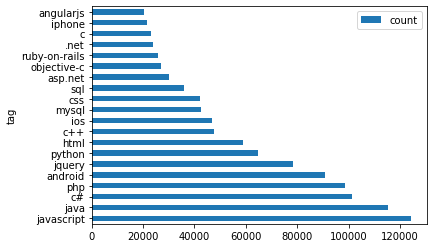

In [0]:
Tags_df= tags.head(20)
Tags_df.plot.barh(x='tag', y='count', rot=0)

#### How popular are some of the data science tags?

In [0]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []

for tag in data_science:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
    
print(x)
print(y)

['python', 'r', 'matlab', 'sas', 'excel', 'sql']
[64601, 15701, 6495, 697, 10384, 35782]


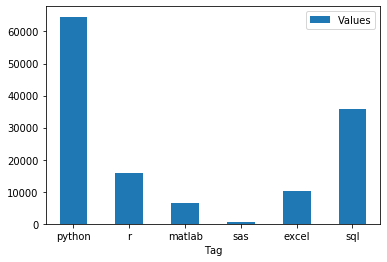

In [0]:
DS_Tags_df = pd.DataFrame(list(zip(x, y)), columns =['Tag', 'Values'])
DS_Tags_df.plot.bar(x='Tag', y='Values', rot=0)

#### What are the most popular tags amongst reputed users?

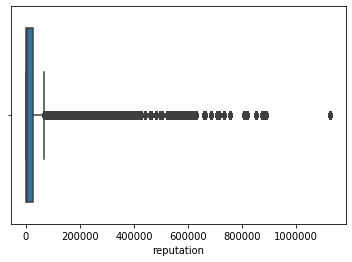

In [0]:
# First let us set a threshold to classify any user as reputed or not
sns.boxplot(inp0['reputation']) # Creating a boxplot of the reputation of all users

In [0]:
inp0.reputation.quantile([0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 1])

0.010          1.0
0.100        143.0
0.200        600.0
0.300       1371.0
0.500       5014.0
0.700      18911.0
0.900     110691.0
0.950     236842.0
0.990     714584.0
0.999    1128126.0
1.000    1128126.0
Name: reputation, dtype: float64

In [0]:
inp0[inp0['reputation'] > inp0['reputation'].quantile(0.99)].shape

(19044, 19)

In [0]:
# Hence we will be filtering out within the top 19044 users
# So we shall consider those users whose reputation lie in the top 99 percentile

inp1 = inp0[inp0['reputation'] > inp0['reputation'].quantile(0.99)]

reputed_users_tags = inp1['Tag'].str.cat(sep=',')
reputed_users_tags_dict = Counter(reputed_users_tags.split(','))

reputed_users_tags_df = pd.DataFrame([list(reputed_users_tags_dict.keys()), list(reputed_users_tags_dict.values())])
reputed_users_tags_df = reputed_users_tags_df.transpose()
reputed_users_tags_df.columns = ['tag', 'count']
reputed_users_tags_df = reputed_users_tags_df.sort_values(by='count', ascending=False)
reputed_users_tags_df.head()

,tag,count
21,c#,4289
224,sql,2434
42,java,2183
486,android,1885
179,python,1630


#### What are the most popular tags amongst the closed questions

In [0]:
inp1 = inp0.dropna(subset = ['ClosedDate'])
Questions_closed_date_tags = inp1['Tag'].str.cat(sep=',')
Questions_closed_date_tags_dict = Counter(Questions_closed_date_tags.split(','))

In [0]:
Questions_closed_date_tags_df = pd.DataFrame([list(Questions_closed_date_tags_dict.keys()), list(Questions_closed_date_tags_dict.values())])
Questions_closed_date_tags_df = Questions_closed_date_tags_df.transpose()
Questions_closed_date_tags_df.columns = ['tag', 'count']
Questions_closed_date_tags_df = Questions_closed_date_tags_df.sort_values(by='count', ascending=False)
Questions_closed_date_tags_df.head()

,tag,count
15,java,14222
85,php,12441
89,javascript,10753
33,c#,9167
72,c++,6876


#### Which tags have the highest scores?

In [0]:
tag_scores = inp0[['Id_x', 'Tag', 'Score_x']].drop_duplicates().reset_index(drop=True)
tag_scores = tag_scores.dropna(axis = 0, how = 'any', inplace = False).reset_index(drop=True) # Removing any nan values
tag_scores.head()

,Id_x,Tag,Score_x
0,80,"flex,actionscript-3,air",26
1,90,"svn,tortoisesvn,branch,branching-and-merging",144
2,120,"sql,asp.net,sitemap",21
3,180,"algorithm,language-agnostic,colors,color-space",53
4,260,"c#,.net,scripting,compiler-construction",49


In [0]:
tagScore = {}
for i in tqdm_notebook(range(len(tag_scores['Tag']))):
    
    for tag in tag_scores['Tag'][i].split(','):
        try:
            tagScore[tag].append(tag_scores['Score_x'][i])
        except Exception:
            tagScore[tag] = [tag_scores['Score_x'][i]]

In [0]:
## Determining the average score for each tag

tagScoreAvg = {}
for key in list(tagScore.keys()):
    tagScoreAvg[key] = np.average(tagScore[key])

In [0]:
# Using pandas dataframe for sorting

tagScoreAvg = pd.DataFrame([list(tagScoreAvg.keys()), list(tagScoreAvg.values())])
tagScoreAvg = tagScoreAvg.transpose()
tagScoreAvg.columns = ['Tag', 'Score_x']
tagScoreAvg = tagScoreAvg.sort_values('Score_x')

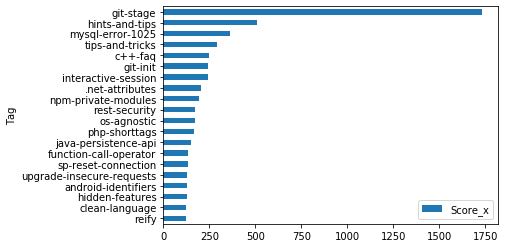

In [0]:
# Top 20 tags with highest average scores

high_tag= tagScoreAvg.tail(20)
high_tag.plot.barh(x='Tag', y='Score_x', rot=0)

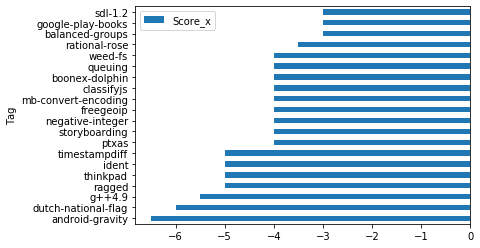

In [0]:
# Top 20 tags with lowest average scores

low_tag= tagScoreAvg.head(20)
low_tag.plot.barh(x='Tag', y='Score_x', rot=0)

In [0]:
import random

random.seed(0)

# We have selected 10 random tags amongst the top 50 most popular tags and appended it with few data science tags which we can
# use for comparison later

n = 10
random_tags = []

i = 0
while i<n:
    random_tag = tags['tag'][random.randint(0, 50)]
    if random_tag not in data_science:
        random_tags.append(random_tag)
        i = i+1
    
top_scoring_tags = np.append(data_science, random_tags)

In [0]:
top_scoring_tags

array(['python', 'r', 'matlab', 'sas', 'excel', 'sql', 'sql-server-2005',
       'unit-testing', 'release-management', 'air', 'scripting',
       'database', 'installation', 'deployment', 'version-control', 'oop'],
      dtype='<U18')

#### Let us try to find those users who answer questions for any particular tag most frequently

In [0]:
dfQATU_owners_alltags = inp0.groupby(['OwnerUserId_y'])['Tag'].apply(','.join).reset_index()
dfQATU_owners_alltags = dfQATU_owners_alltags.reset_index()
dfQATU_owners_alltags.head()

,index,OwnerUserId_y,Tag
0,0,1,"c#,asp.net,regex,regex,regex,language-agnostic..."
1,1,100,"c#,.net,scripting,compiler-construction,.net-3..."
2,2,1000,"java,oop,design,architecture,c#,testing,java,n..."
3,3,1000000,"php,regex,cakephp"
4,4,1000011,"java,file,java,tomcat,spring-mvc,spring-securi..."


In [0]:
dfQATU_owners_tagcount = {}
dfQATU_owners_tagcount = {tag_user : Counter(dfQATU_owners_alltags['Tag'][k].split(',')) for k, tag_user in enumerate(dfQATU_owners_alltags['OwnerUserId_y'])}

In [0]:
#tag_top_users = {tag:[] for tag in top_scoring_tags}
tag_all_users = {tag:[] for tag in top_scoring_tags}

for user in tqdm_notebook(dfQATU_owners_tagcount.keys()):
    common_tags = dfQATU_owners_tagcount[user].keys() & top_scoring_tags
    for tag in common_tags:
        tag_all_users[tag].append(user)
    

#### Let's sort it and get the top 10 users who have answered the most questions for any particular tag 

In [0]:
most_questions_answered_users_dict = {}

for tag in top_scoring_tags:
    
    most_questions_answered_users = tag_all_users[tag]
    most_questions_answered_count = []

    for user in tag_all_users[tag]:
        most_questions_answered_count.append(dfQATU_owners_tagcount[user][tag])

    tag_all_users_df = {'Users': most_questions_answered_users, 'Answered': most_questions_answered_count}
    tag_all_users_df = pd.DataFrame(tag_all_users_df)
    tag_all_users_df = tag_all_users_df.sort_values('Answered', ascending = False)

    most_questions_answered_users_dict[tag] = tag_all_users_df.head(10)

In [0]:
top_scoring_tags

array(['python', 'r', 'matlab', 'sas', 'excel', 'sql', 'sql-server-2005',
       'unit-testing', 'release-management', 'air', 'scripting',
       'database', 'installation', 'deployment', 'version-control', 'oop'],
      dtype='<U18')

In [0]:
# So suppose you we want to find the top 10 users who have answered most questions in sql
most_questions_answered_users_dict['sql']

,Users,Answered
1324,1144035,2310
19889,491243,356
26378,939860,265
20272,50552,264
3192,135152,255
14547,330315,232
3037,13302,223
24544,73226,215
12098,27535,210
17977,426671,204


#### Trend of some data science and non - data science tags

In [0]:
dfQATU_trend = inp0[['CreationDate_x', 'Tag']]

dfQATU_trend = dfQATU_trend.sort_values(by='CreationDate_x')
dfQATU_trend_day = dfQATU_trend.copy()

In [0]:
dfQATU_trend['CreationDate_x'] = dfQATU_trend['CreationDate_x'].dt.to_period('M') # Extracting only the month and year
dfQATU_trend['CreationDate_x'] = dfQATU_trend['CreationDate_x'].astype(str)

dateline = dfQATU_trend['CreationDate_x'].unique()

In [0]:
dfQATU_trend = dfQATU_trend.groupby(['CreationDate_x'])['Tag'].apply(','.join).reset_index()
dfQATU_trend.head()

,CreationDate_x,Tag
0,2008-08,"flex,actionscript-3,air,c#,.net,scripting,comp..."
1,2008-09,"research,research,research,research,research,r..."
2,2008-10,"c#,search,file,design-patterns,powershell,netw..."
3,2008-11,"data-structures,directory,directory-structure,..."
4,2008-12,"xml,web-services,google-app-engine,soap,apache..."


In [0]:
print('Our time series analysis will be performed on the following tags:')
print(top_scoring_tags)

Our time series analysis will be performed on the following tags:
['python' 'r' 'matlab' 'sas' 'excel' 'sql' 'sql-server-2005'
 'unit-testing' 'release-management' 'air' 'scripting' 'database'
 'installation' 'deployment' 'version-control' 'oop']


In [0]:
top_scoring_tags_dict = {tag:[] for tag in top_scoring_tags}

# Counting the number of times, a particular keyword was tagged per month

for k, month in enumerate(dfQATU_trend['CreationDate_x']):
    tag_counts = Counter(dfQATU_trend['Tag'][k].split(','))
    for top_tag in top_scoring_tags:
        try:
            top_scoring_tags_dict[top_tag].append(tag_counts[top_tag])
        except Exception:
            top_scoring_tags_dict[top_tag].append(0)

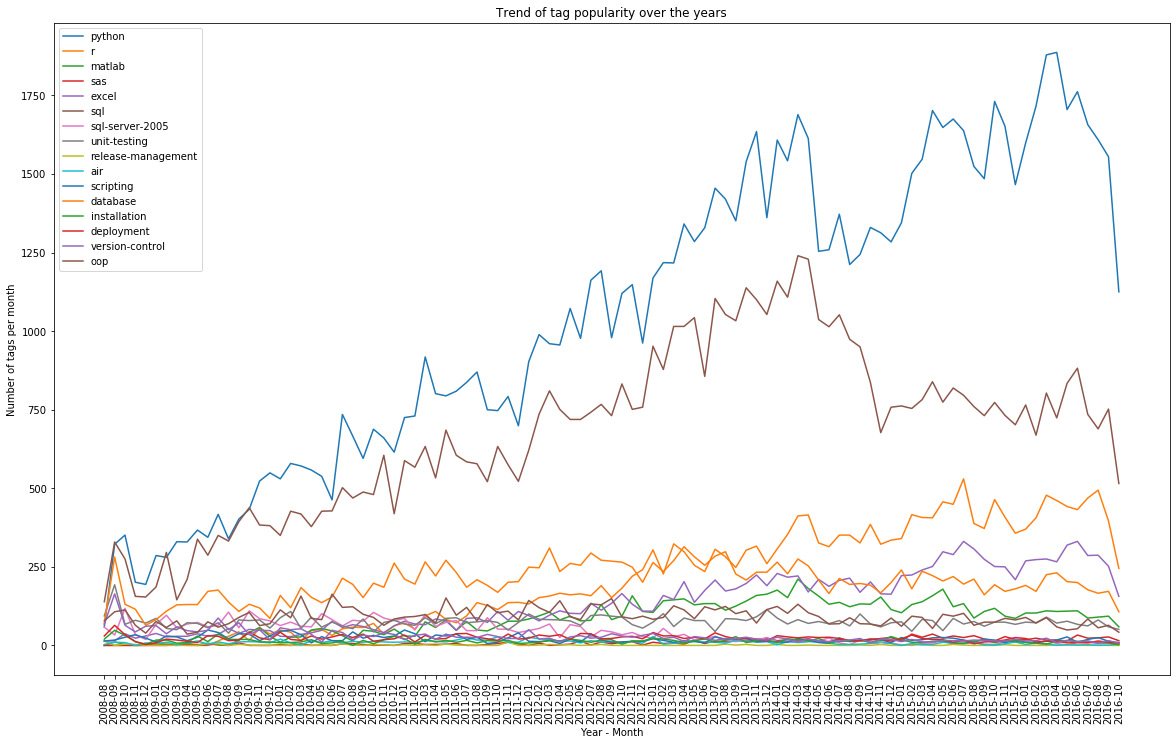

In [0]:
# Final Plotting

plt.figure(figsize=(20,12)) 
for tag in top_scoring_tags_dict:
    plt.plot(top_scoring_tags_dict[tag], label = tag)
    
plt.ylabel('Number of tags per month')
plt.xlabel('Year - Month')
plt.title('Trend of tag popularity over the years')
plt.xticks(np.arange(len(dateline)), dateline, rotation=90)
plt.legend(loc = 'best')
plt.show()

#### Let us do a similar plot for analysing only the yearly growth

In [0]:
dfQATU_trend['CreationDate_year'] = dfQATU_trend['CreationDate_x'].apply(lambda x: x.split("-")[0]) # Extracting only the year
yearline = dfQATU_trend['CreationDate_year'].unique()

In [0]:
dfQATU_year_trend = dfQATU_trend.groupby(['CreationDate_year'])['Tag'].apply(','.join).reset_index()
dfQATU_year_trend.head()

,CreationDate_year,Tag
0,2008,"flex,actionscript-3,air,c#,.net,scripting,comp..."
1,2009,"python,data-structures,recursion,cyclic-refere..."
2,2010,"php,php,php,sql,c#,gdi+,php,mysql,store-data,p..."
3,2011,"iphone,cocoa,xcode,wcf,generated-code,service-..."
4,2012,"html,css,xcode,interface,uiimageview,builder,x..."


In [0]:
top_scoring_tags_yearly = {tag:[] for tag in top_scoring_tags}

# Counting the number of times, a particular keyword was tagged per year

for k, year in enumerate(dfQATU_year_trend['CreationDate_year']):
    tag_counts = Counter(dfQATU_year_trend['Tag'][k].split(','))
    for top_tag in top_scoring_tags:
        try:
            top_scoring_tags_yearly[top_tag].append(tag_counts[top_tag])
        except Exception:
            top_scoring_tags_yearly[top_tag].append(0)

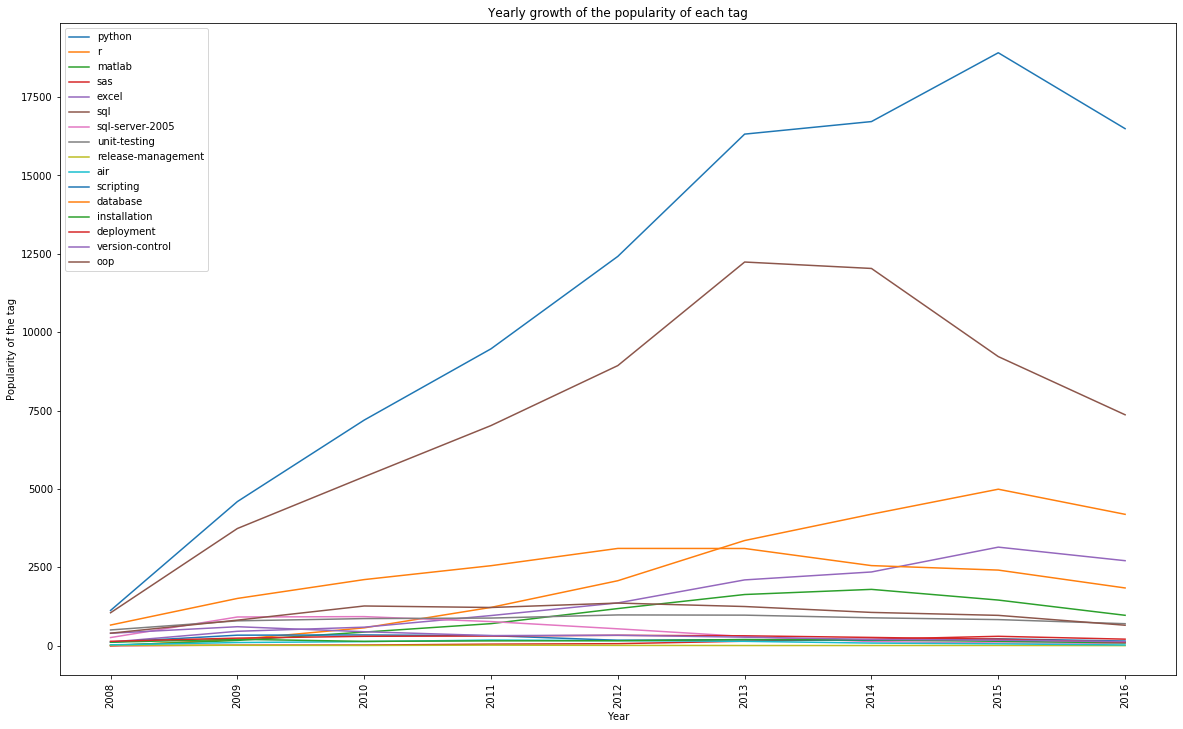

In [0]:
# Final Plotting

plt.figure(figsize=(20,12)) 
#for tag in top_scoring_tags_dict:
for tag in top_scoring_tags_dict:
    plt.plot(top_scoring_tags_yearly[tag], label = tag)
    
plt.ylabel('Popularity of the tag')
plt.xlabel('Year')
plt.title('Yearly growth of the popularity of each tag')
plt.xticks(np.arange(len(yearline)), yearline, rotation=90)
plt.legend(loc = 'best')
plt.show()

#### Analysing the Growth Rate of tags over the years

In [0]:
top_scoring_tags_growth = {}
for tag in top_scoring_tags_yearly.keys():
    slope = []
    for i in range(len(top_scoring_tags_yearly[tag])-1):
        slope.append(top_scoring_tags_yearly[tag][i+1] - top_scoring_tags_yearly[tag][i])
    top_scoring_tags_growth[tag] = slope

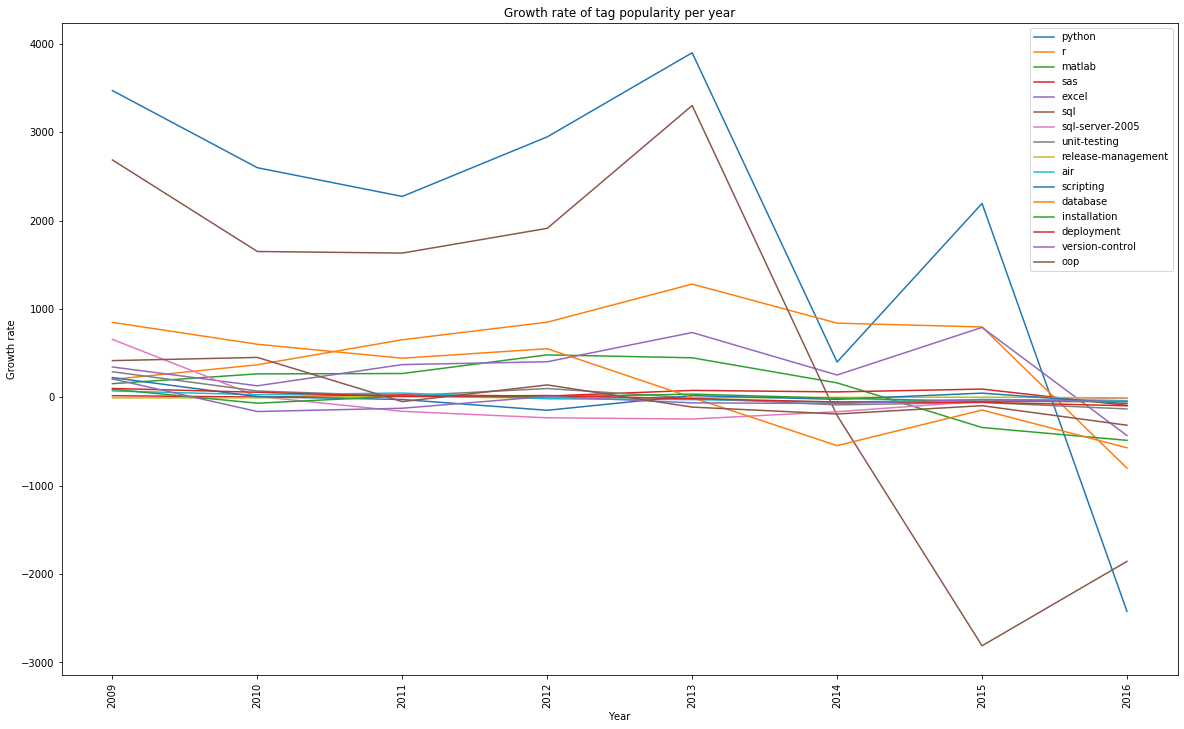

In [0]:
# Final Plotting

plt.figure(figsize=(20,12))
for tag in top_scoring_tags_dict:
    plt.plot(top_scoring_tags_growth[tag], label = tag)
    
plt.ylabel('Growth rate')
plt.xlabel('Year')
plt.title('Growth rate of tag popularity per year')
plt.xticks(np.arange(len(yearline)-1), yearline[1:], rotation=90)
plt.legend(loc = 'best')
plt.show()

#### Comparing the popularity of tags for different months

In [0]:
dfQATU_trend['CreationDate_month'] = dfQATU_trend['CreationDate_x'].apply(lambda x: x.split("-")[1]) # Extracting only the year
monthline = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

dfQATU_month_trend = dfQATU_trend.groupby(['CreationDate_month'])['Tag'].apply(','.join).reset_index()
dfQATU_month_trend

,CreationDate_month,Tag
0,01,"python,data-structures,recursion,cyclic-refere..."
1,02,"visual-c++,c++-cli,clr,database,sql-server-200..."
2,03,"hardware,hardware,c++,hardware,hard-drive,delp..."
3,04,"sql,pivot,sql,pivot,iphone,uiimageview,iphone,..."
4,05,"c#,asp.net,vb.net,webforms,c#,asp.net,vb.net,w..."
5,06,"ruby-on-rails,validation,activerecord,nested,o..."
6,07,"html,css,user-interface,frontend,c++,windows,m..."
7,08,"flex,actionscript-3,air,c#,.net,scripting,comp..."
8,09,"research,research,research,research,research,r..."
9,10,"c#,search,file,design-patterns,powershell,netw..."


In [0]:
top_scoring_tags_months = {tag:[] for tag in top_scoring_tags}

# Counting the number of times, a particular keyword was tagged per month

for k, year in enumerate(dfQATU_month_trend['CreationDate_month']):
    tag_counts = Counter(dfQATU_month_trend['Tag'][k].split(','))
    for top_tag in top_scoring_tags:
        try:
            top_scoring_tags_months[top_tag].append(tag_counts[top_tag])
        except Exception:
            top_scoring_tags_months[top_tag].append(0)

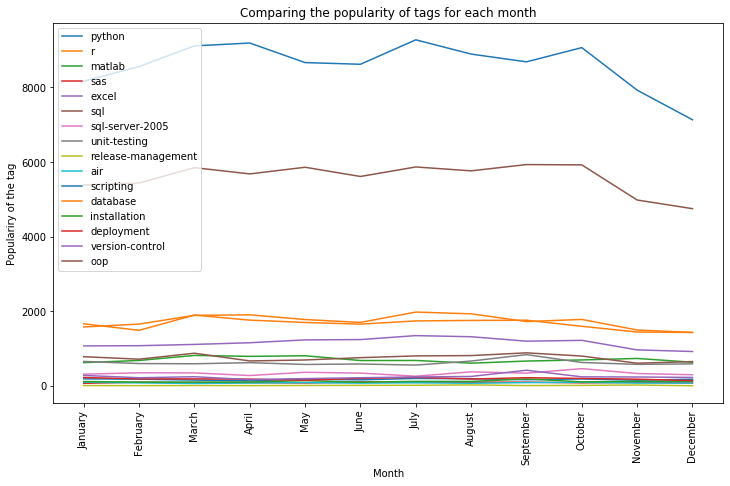

In [0]:
# Final Plotting

plt.figure(figsize=(12,7)) 
for tag in top_scoring_tags_months:
    plt.plot(top_scoring_tags_months[tag], label = tag)
    
plt.ylabel('Popularity of the tag')
plt.xlabel('Month')
plt.title('Comparing the popularity of tags for each month')
plt.xticks(np.arange(len(monthline)), monthline, rotation=90)
plt.legend(loc = 'upper left')
plt.show()

In [0]:
# Tags seem to be used slightly less frequently during the summer and winter holidays, don't you think?

In [0]:
Days_of_Week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfQATU_trend_day['CreationDate_x'] = dfQATU_trend_day['CreationDate_x'].dt.day_name().astype(str)
dfQATU_day_trend = dfQATU_trend_day.groupby('CreationDate_x')['Tag'].apply(','.join).reindex(Days_of_Week)
dfQATU_day_trend

CreationDate_x
Monday       sql-server,windows-server-2008,sql-server,wind...
Tuesday      powershell,cmdlets,powershell,cmdlets,powershe...
Wednesday    math,math,math,math,math,math,math,sql-server,...
Thursday     sql-server,sql-server,c#,.net,sharepoint,assem...
Friday       flex,actionscript-3,air,c#,.net,scripting,comp...
Saturday     sql-server,sql-server-2005,deployment,release-...
Sunday       windows,visual-studio,registry,installation,wi...
Name: Tag, dtype: object

In [0]:
top_scoring_tags_day = {tag:[] for tag in top_scoring_tags}

# Counting the number of times, a particular keyword was tagged on a particular day of the week

for k, day in enumerate(dfQATU_day_trend):
    tag_counts = Counter(dfQATU_day_trend[k].split(','))
    for top_tag in top_scoring_tags:
        try:
            top_scoring_tags_day[top_tag].append(tag_counts[top_tag])
        except Exception:
            top_scoring_tags_day[top_tag].append(0)

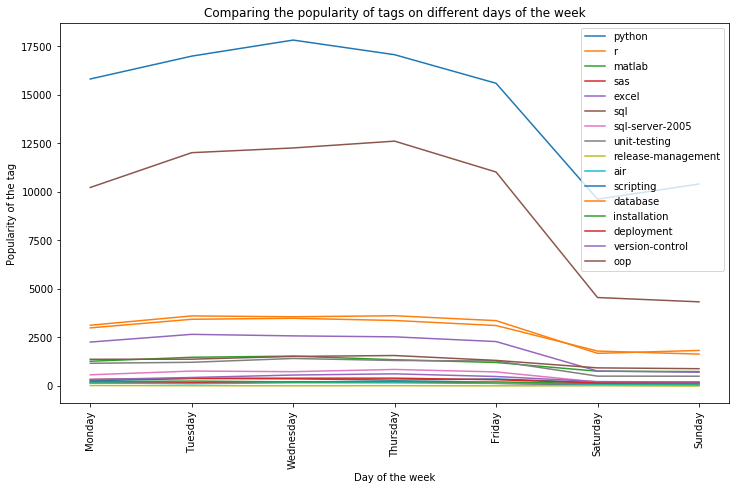

In [0]:
# Final Plotting

plt.figure(figsize=(12,7)) 
for tag in top_scoring_tags_day:
    plt.plot(top_scoring_tags_day[tag], label = tag)
    
plt.ylabel('Popularity of the tag')
plt.xlabel('Day of the week')
plt.title('Comparing the popularity of tags on different days of the week')
plt.xticks(np.arange(len(Days_of_Week)), Days_of_Week, rotation=90)
plt.legend(loc = 'best')
plt.show()

In [0]:
# Looks like people like being more active  during the weekdays